# 배울 내용
## CAM: Class Activation Map

* "모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지" 확인할 수 있는 지도 
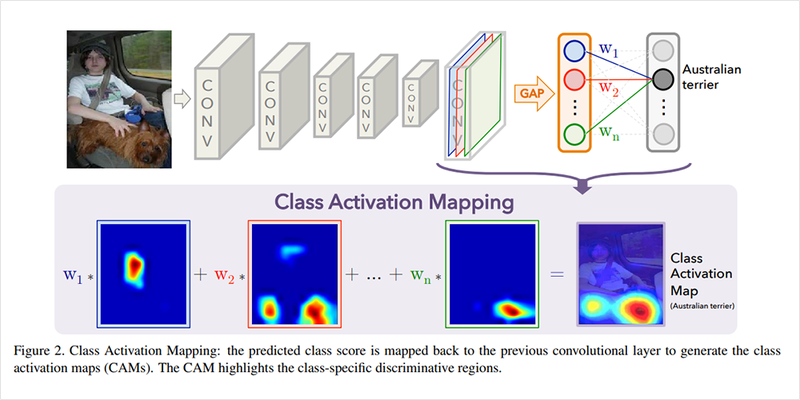

1. CAM을 얻을 수 있는 네트워크는 위 그림에서 볼 수 있습니다. 먼저 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해서 GAP을 적용합니다 (GAP을 통해 각 채널별 정보를 요약)
2. 이에 대해서 소프트맥스 레이어(소프트맥스 활성화 함수를 가지고 bias가 없는 fully connected layer)를 적용합니다. (소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정)
3. 이를 보간(interpolation)을 통해 적절히 원본 이미지 크기로 확대
4. 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화시키는지 확인

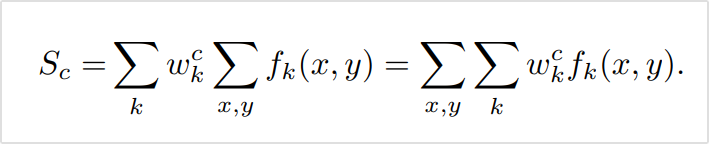
* $w_k^c$ 는 가중치값, $f_k(x,y)$는 활성화 값입니다.
* 위 식을 통해 클래스 별 점수 $S_c$를 얻을 수 있습니다.

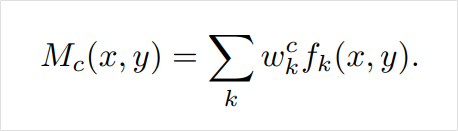
* CAM을 얻기 위해서는 클래스별 점수를 얻을때 모든 위치가 아니라 k개의 채널만을 더해 위치정보를 얻습니다.
* 즉 $M_c(x,y)$는 모델이 클래스c에 대해 각 위치를 얼마나 보고있는지 나타내게 됩니다. 

## GRAD-CAM

* CAM 에서는 GAP, CNN의 마지막 레이어를 통해 결과물을 시각화 했습니다.
* Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없으며, 분류 문제 외의 다른 태스크들에 유연하게 대처 할 수 있습니다.
* Grad-CAM에서는 높은 분별력과 큰 dimension을 갖는 CAM을 만드는 것을 중요하게 보았습니다.

---
<center><span style="color: red"><b>GRAD-CAM의 전체구조</b></span></center>

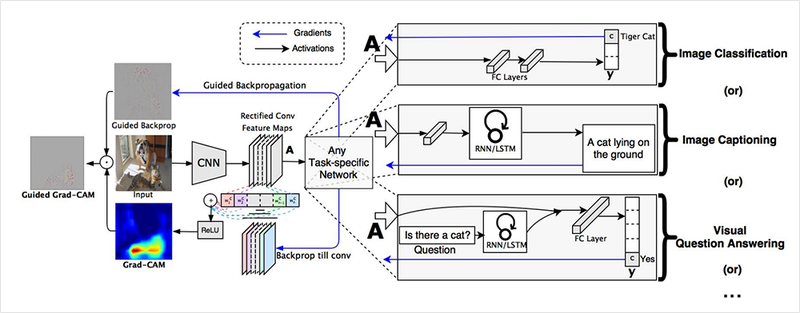

* 원하는 클래스에 대해 관찰하려는 레이어로 들어오는 Gradient를 구하여, 해당 클래스를 활성화할 때, 레이어에 어떤 부분이 중요하게 작용하는지 알 수 있습니다.

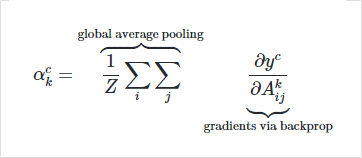

* 이렇게 찾은 Gradient에 ReLU 활성화를 시켜 불필요한 음의 값을 제거하고, 양의값의 세기를 관측합니다.

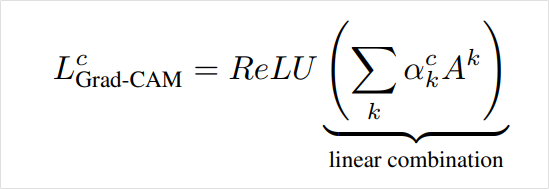

## ACoL: Adversarial Complementary Learning

* 레이어에서 활성화 된 위치정보를 통해 Object detecting 을 하는 비지도학습(Weakly-supervised Learning)
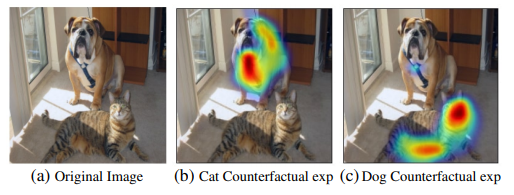
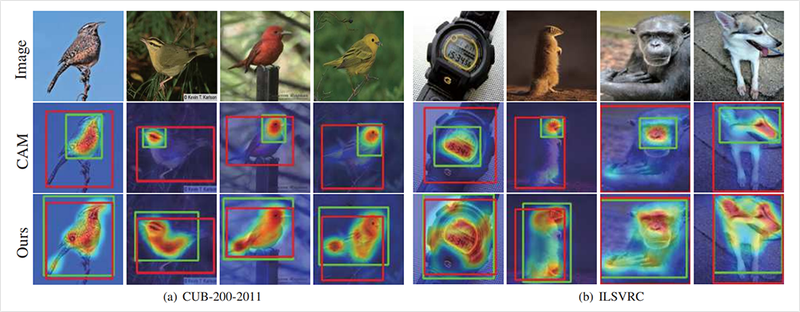

* CAM, Grad-CAM을 통해 비지도 학습의 가능성을 보여주지만 물체의 가장자리를 검출하는 것이 아니라 물체의 특징을 중심으로 활성화 되는 모습을 볼 수 있습니다.

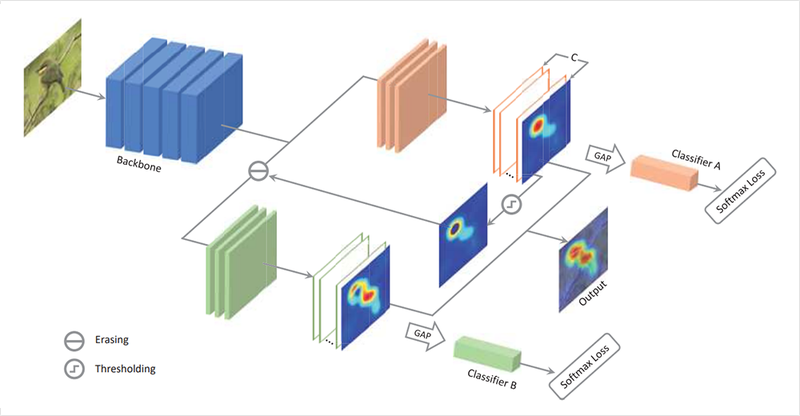
* ACoL 에서 Adversarial 은 너무 높은 활성화 부분을 지워줌(Threadholding)으로서 주변 특성을 반영하도록 하였습니다.

# 연습

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image

C:\Users\rh987\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (C:\tools\miniconda3\envs\tf\lib\site-packages\google\protobuf\internal\__init__.py)